In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

np.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('datasets/wine.csv', header=None)
df = df_pre.sample(frac=0.15) # 원본 데이터프레임에서 15%만큼 데이터를 샘플링해 새로운 데이터프레임을 만든다

print(df.shape) # 크기
df.head()

(975, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [13]:
X = df.iloc[:,:12]
y = df.iloc[: , 12]

In [19]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X, y, validation_split=0.33, epochs=100, batch_size=20) # validation : 검증셋
history

Epoch 1/100


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2905 - loss: 20.3654 - val_accuracy: 0.2453 - val_loss: 6.4415
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.3181 - loss: 3.5525 - val_accuracy: 0.7609 - val_loss: 0.4083
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.7138 - loss: 0.4333 - val_accuracy: 0.8137 - val_loss: 0.3413
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.8271 - loss: 0.3644 - val_accuracy: 0.9037 - val_loss: 0.2594
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.9218 - loss: 0.2708 - val_accuracy: 0.9161 - val_loss: 0.2206
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9213 - loss: 0.2412 - val_accuracy: 0.9161 - val_loss: 0.2086
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9213 - loss: 0.2317 - val_accuracy: 0.9193 - val_loss: 0.2022
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.9212 - loss: 0.2264 - val_accuracy: 0.9193 

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

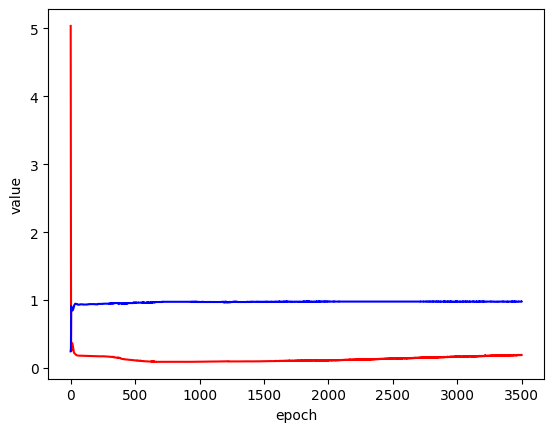

In [32]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(val_loss, c='red', label='val_loss')
plt.plot(val_acc, c='blue', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [31]:
import os

np.random.seed(3)
tf.random.set_seed(3)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X, y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[checkpointer]) # validation : 검증셋

Epoch 1/3500


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.2720 - loss: 6.8642
Epoch 1: val_loss improved from inf to 5.03522, saving model to ./model/01-5.0352.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2734 - loss: 6.4745 - val_accuracy: 0.2453 - val_loss: 5.0352
Epoch 2/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2720 - loss: 4.8258
Epoch 2: val_loss improved from 5.03522 to 2.97390, saving model to ./model/02-2.9739.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2734 - loss: 4.4639 - val_accuracy: 0.2453 - val_loss: 2.9739
Epoch 3/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2720 - loss: 2.8413
Epoch 3: val_loss improved from 2.97390 to 1.25608, saving model to ./model/03-1.2561.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2734 - loss: 2.5411 - val_accuracy: 0.3292 - val_loss: 1.2561
Epoch 4/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3380 - loss: 1.1977
Epoch 4: val_loss improved from 1.25608 to 0.45564, saving mo

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

np.random.seed(3)
tf.random.set_seed(3)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=50)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X, y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping, checkpointer]) # validation : 검증셋

Epoch 1/3500


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.7600 - loss: 0.4455
Epoch 1: val_loss improved from inf to 0.42173, saving model to ./model/01-0.4217.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7648 - loss: 0.4767 - val_accuracy: 0.7609 - val_loss: 0.4217
Epoch 2/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7880 - loss: 0.4075
Epoch 2: val_loss improved from 0.42173 to 0.41550, saving model to ./model/02-0.4155.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7905 - loss: 0.4357 - val_accuracy: 0.7950 - val_loss: 0.4155
Epoch 3/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8100 - loss: 0.3872
Epoch 3: val_loss improved from 0.41550 to 0.40595, saving model to ./model/03-0.4060.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8101 - loss: 0.4105 - val_accuracy: 0.8168 - val_loss: 0.4060
Epoch 4/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8220 - loss: 0.3748
Epoch 4: val_loss improved from 0.40595 to 0.38685, saving mo